In [44]:
from sklearn.datasets import load_boston
import pandas as pd
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head(n=10)

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [45]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(13, ), activation='relu',name='dense_1'))
model.add(Dense(32, activation='relu', name='dense_2'))
model.add(Dense(16, activation='relu', name='dense_3'))
model.add(Dense(1, name='dense_output')) # model.add(Dense(1, activation='???', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                896       
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_output (Dense)        (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


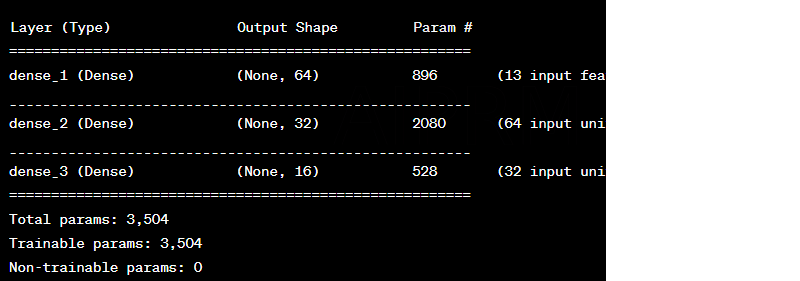

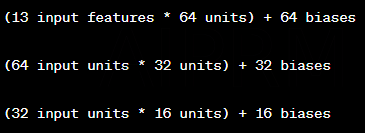

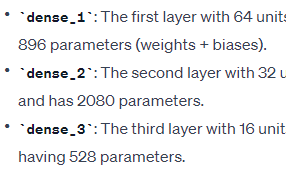

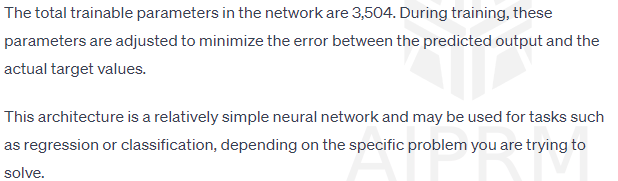

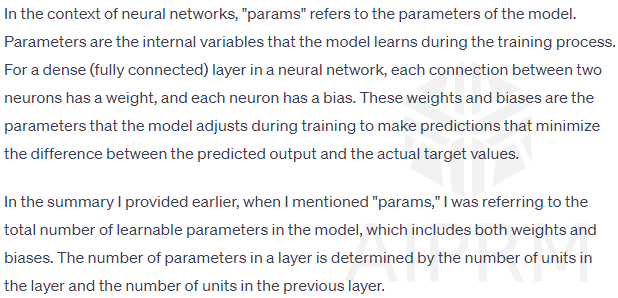

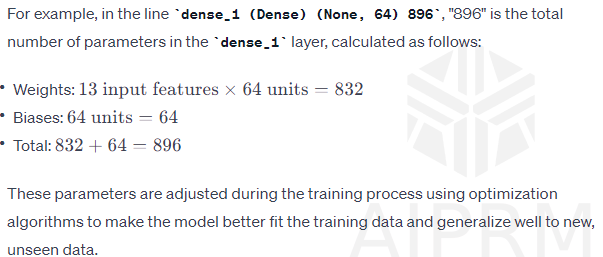

In [46]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [47]:
# Standarzation of X_train and y_train
???????

In [48]:
history = model.fit(??????)

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 984.9438 - mae: 23.6893 - val_loss: 424.3617 - val_mae: 17.3784
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 208.4348 - mae: 11.0708 - val_loss: 116.9112 - val_mae: 8.7504
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 104.6604 - mae: 7.7117 - val_loss: 112.1529 - val_mae: 7.0485
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 79.1141 - mae: 6.5144 - val_loss: 85.1946 - val_mae: 7.7844
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 66.2189 - mae: 6.3677 - val_loss: 92.4870 - val_mae: 6.6276
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 62.9151 - mae: 5.7847 - val_loss: 77.3952 - val_mae: 6.7274
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 59.8104 - mae: 5.6863 - val_loss: 82.3684 - val_mae: 6.3137
Epoch 8/100
10/10 [==============================] - 0s 3ms

In [34]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],name='Valid'))
fig.update_layout(height=500, width=700,xaxis_title='Epoch',yaxis_title='Loss')
fig.show()

In [35]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_mae'],name='Valid'))
fig.update_layout(height=500, width=700,xaxis_title='Epoch',yaxis_title='mae')
fig.show()